# read in daily zarr FEISTY output and write out a monthly netcdf 

In [2]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
import cartopy
import cartopy.crs as ccrs
import warnings
warnings.filterwarnings('ignore')
import pop_tools 
import dask
import utils

In [3]:
def get_ClusterClient():
    import dask
    from dask_jobqueue import PBSCluster
    from dask.distributed import Client
    cluster = PBSCluster(
        cores=1,
        memory='100GB',
        processes=1,
        queue='casper',
        resource_spec='select=1:ncpus=1:mem=100GB',
        project='NCGD0011',
        walltime='04:00:00',
        interface='ext',)

    dask.config.set({
        'distributed.dashboard.link':
        'https://jupyterhub.hpc.ucar.edu/stable/user/{USER}/proxy/{port}/status'
    })
    client = Client(cluster)
    return cluster, client

In [4]:
cluster, client = get_ClusterClient()
cluster.scale(6) 
client

Client Scheduler: tcp://128.117.208.174:39551 Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/kristenk/proxy/44745/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [5]:
#cluster.close()

## get daily data and immediately convert it to monthly

### first 50 year chunk

In [6]:
ens_mem ='1101.006'

st_year=1850
end_year = 1899

In [7]:
### first do the first year (otherwise concat doesn't work)

yr4="{:04d}".format(st_year)

path = '/glade/derecho/scratch/kristenk/feisty_output/CESM2-LENS/' + ens_mem + '/hist/CESM2-LENS.' + ens_mem + '_' + yr4 + '.zarr'
print(path)
ds_tmp = xr.open_zarr(path, consolidated=False)

ds = ds_tmp.resample({'time':'M'}).mean(dim='time').compute()

### then do the rest of the years

for year in np.arange(st_year+1,end_year+1,1):
    
    print(year)
    
    yr4="{:04d}".format(year)
    
    path = '/glade/derecho/scratch/kristenk/feisty_output/CESM2-LENS/' + ens_mem + '/hist/CESM2-LENS.' + ens_mem + '_' + yr4 + '.zarr'
    ds_tmp = xr.open_zarr(path, consolidated=False)
    
    ds_mon = ds_tmp.resample({'time':'M'}).mean(dim='time').compute()
    
    ds = xr.concat([ds, ds_mon], "time")

/glade/derecho/scratch/kristenk/feisty_output/CESM2-LENS/1101.006/hist/CESM2-LENS.1101.006_1850.zarr
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899


In [8]:
ds

<xarray.Dataset>
Dimensions:     (fish: 8, group: 9, nlat: 384, nlon: 320, time: 600)
Coordinates:
  * time        (time) object 1850-01-31 00:00:00 ... 1899-12-31 00:00:00
  * fish        (fish) object 'Sf' 'Sp' 'Sd' 'Mf' 'Mp' 'Md' 'Lp' 'Ld'
  * group       (group) object 'Sf' 'Sp' 'Sd' 'Mf' ... 'Lp' 'Ld' 'benthic_prey'
  * nlat        (nlat) int64 0 1 2 3 4 5 6 7 ... 376 377 378 379 380 381 382 383
  * nlon        (nlon) int64 0 1 2 3 4 5 6 7 ... 312 313 314 315 316 317 318 319
Data variables:
    biomass     (time, group, nlat, nlon) float64 nan nan nan ... nan nan nan
    fish_yield  (time, fish, nlat, nlon) float64 nan nan nan nan ... nan nan nan
    production  (time, fish, nlat, nlon) float64 nan nan nan nan ... nan nan nan

### Add units to FEISTY

In [9]:
ds.biomass.attrs['units'] = 'g WW/m^2'
ds.production.attrs['units'] = 'g WW/m^2/d'
ds.fish_yield.attrs['units'] = 'g WW/m^2/d'

### Write out netcdf of monthly FEISTY

In [10]:
out_dir = '/glade/campaign/cesm/development/bgcwg/projects/CESM2-LE-FEISTY/'

In [11]:
ds.to_netcdf(out_dir + 'CESM2-LE-FEISTY-HIST-SSP370-cmip6-ensmem-' + ens_mem + '_' + str(st_year) + '01-' + str(end_year) + '12.nc', mode='w')

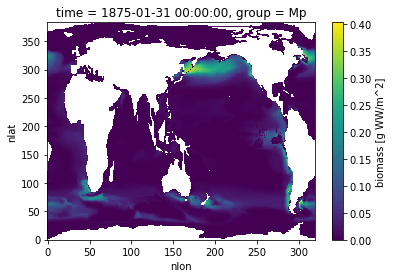

In [12]:
ds.biomass.sel(group='Mp').isel(time=300).plot()

### second 50 year chunk

In [13]:
st_year=1900
end_year = 1949

In [14]:
### first do the first year (otherwise concat doesn't work)

yr4="{:04d}".format(st_year)

path = '/glade/derecho/scratch/kristenk/feisty_output/CESM2-LENS/' + ens_mem + '/hist/CESM2-LENS.' + ens_mem + '_' + yr4 + '.zarr'

ds_tmp = xr.open_zarr(path, consolidated=False)

ds = ds_tmp.resample({'time':'M'}).mean(dim='time').compute()

### then do the rest of the years

for year in np.arange(st_year+1,end_year+1,1):
    
    print(year)
    
    yr4="{:04d}".format(year)
    
    path = '/glade/derecho/scratch/kristenk/feisty_output/CESM2-LENS/' + ens_mem + '/hist/CESM2-LENS.' + ens_mem + '_' + yr4 + '.zarr'
        
    ds_tmp = xr.open_zarr(path, consolidated=False)
    
    ds_mon = ds_tmp.resample({'time':'M'}).mean(dim='time').compute()
    
    ds = xr.concat([ds, ds_mon], "time")

1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949


In [15]:
ds.biomass.attrs['units'] = 'g WW/m^2'
ds.production.attrs['units'] = 'g WW/m^2/d'
ds.fish_yield.attrs['units'] = 'g WW/m^2/d'

In [16]:
ds.to_netcdf(out_dir + 'CESM2-LE-FEISTY-HIST-SSP370-cmip6-ensmem-' + ens_mem + '_' + str(st_year) + '01-' + str(end_year) + '12.nc', mode='w')

### Third 50 year chunk

In [17]:
st_year=1950
end_year = 1999

In [18]:
### first do the first year (otherwise concat doesn't work)

yr4="{:04d}".format(st_year)

path = '/glade/derecho/scratch/kristenk/feisty_output/CESM2-LENS/' + ens_mem + '/hist/CESM2-LENS.' + ens_mem + '_' + yr4 + '.zarr'

ds_tmp = xr.open_zarr(path, consolidated=False)

ds = ds_tmp.resample({'time':'M'}).mean(dim='time').compute()

### then do the rest of the years

for year in np.arange(st_year+1,end_year+1,1):
    
    print(year)
    
    yr4="{:04d}".format(year)
    
    path = '/glade/derecho/scratch/kristenk/feisty_output/CESM2-LENS/' + ens_mem + '/hist/CESM2-LENS.' + ens_mem + '_' + yr4 + '.zarr'
    
    ds_tmp = xr.open_zarr(path, consolidated=False)
    
    ds_mon = ds_tmp.resample({'time':'M'}).mean(dim='time').compute()
    
    ds = xr.concat([ds, ds_mon], "time")

1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999


In [19]:
ds.biomass.attrs['units'] = 'g WW/m^2'
ds.production.attrs['units'] = 'g WW/m^2/d'
ds.fish_yield.attrs['units'] = 'g WW/m^2/d'

In [20]:
ds.to_netcdf(out_dir + 'CESM2-LE-FEISTY-HIST-SSP370-cmip6-ensmem-' + ens_mem + '_' + str(st_year) + '01-' + str(end_year) + '12.nc', mode='w')

### 4th 50 year chunk

In [21]:
st_year=2000
end_year = 2049

In [22]:
### first do the first year (otherwise concat doesn't work)

yr4="{:04d}".format(st_year)

path = '/glade/derecho/scratch/kristenk/feisty_output/CESM2-LENS/' + ens_mem + '/hist/CESM2-LENS.' + ens_mem + '_' + yr4 + '.zarr'
ds_tmp = xr.open_zarr(path, consolidated=False)

ds = ds_tmp.resample({'time':'M'}).mean(dim='time').compute()

### then do the rest of the years

for year in np.arange(st_year+1,end_year+1,1):
    
    print(year)
    
    yr4="{:04d}".format(year)
    
    path = '/glade/derecho/scratch/kristenk/feisty_output/CESM2-LENS/' + ens_mem + '/hist/CESM2-LENS.' + ens_mem + '_' + yr4 + '.zarr'
    
    ds_tmp = xr.open_zarr(path, consolidated=False)
    
    ds_mon = ds_tmp.resample({'time':'M'}).mean(dim='time').compute()
    
    ds = xr.concat([ds, ds_mon], "time")

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049


In [23]:
ds.biomass.attrs['units'] = 'g WW/m^2'
ds.production.attrs['units'] = 'g WW/m^2/d'
ds.fish_yield.attrs['units'] = 'g WW/m^2/d'

In [24]:
ds.to_netcdf(out_dir + 'CESM2-LE-FEISTY-HIST-SSP370-cmip6-ensmem-' + ens_mem + '_' + str(st_year) + '01-' + str(end_year) + '12.nc', mode='w')

### Finally, do 5th chunk which is 51 years

In [25]:
st_year=2050
end_year = 2100

In [26]:
### first do the first year (otherwise concat doesn't work)

yr4="{:04d}".format(st_year)

path = '/glade/derecho/scratch/kristenk/feisty_output/CESM2-LENS/' + ens_mem + '/hist/CESM2-LENS.' + ens_mem + '_' + yr4 + '.zarr'

ds_tmp = xr.open_zarr(path, consolidated=False)

ds = ds_tmp.resample({'time':'M'}).mean(dim='time').compute()

## then do the rest of the years

for year in np.arange(st_year+1,end_year+1,1):
    
    print(year)
    
    yr4="{:04d}".format(year)
    
    path = '/glade/derecho/scratch/kristenk/feisty_output/CESM2-LENS/' + ens_mem + '/hist/CESM2-LENS.' + ens_mem + '_' + yr4 + '.zarr'
    
    ds_tmp = xr.open_zarr(path, consolidated=False)
    
    ds_mon = ds_tmp.resample({'time':'M'}).mean(dim='time').compute()
    
    ds = xr.concat([ds, ds_mon], "time")

2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100


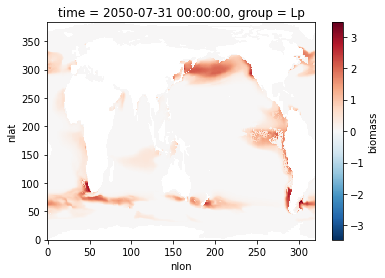

In [27]:
ds.biomass.sel(group='Lp').isel(time=6).plot()

In [28]:
ds.biomass.attrs['units'] = 'g WW/m^2'
ds.production.attrs['units'] = 'g WW/m^2/d'
ds.fish_yield.attrs['units'] = 'g WW/m^2/d'

In [29]:
ds.to_netcdf(out_dir + 'CESM2-LE-FEISTY-HIST-SSP370-cmip6-ensmem-' + ens_mem + '_' + str(st_year) + '01-' + str(end_year) + '12.nc', mode='w')